In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [15]:
def get_score(context_size, model):
    disk_dir = "/mnt/data-poseidon/sumire/thesis"
    lang_list = os.listdir(disk_dir + f"/{context_size}")
    
    for id, lang in enumerate(lang_list):
        lang_list[id] = lang_list[id].replace("en-", "")
    
    lang_scores = {}

    for lang in lang_list:
        score_path = disk_dir+f'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/test_score.txt'
        if os.path.exists(score_path):
            with open(score_path,'r') as wf:
                lang_scores[lang] = wf.readlines()
                
        else:
            lang_scores[lang] = ["bleu: 0", "comet: 0", "gen_len: 0"]
            #print (score_path)
       
    bleu_list = []
    comet_list = []
    for score_list in lang_scores.values():
        bleu = score_list[0]
        bleu = bleu.replace("bleu: ", "")
        bleu = bleu.replace("\n", "")
        bleu = float(bleu)
        
        comet = score_list[1]
        comet = comet.replace("comet: ", "")
        comet = comet.replace("\n", "")
        comet = float(comet)
        bleu_list.append(bleu)
        comet_list.append(comet)
    return comet_list, bleu_list, lang_list


In [16]:
def get_score_b(context_size, model):
    disk_dir = "/mnt/data-poseidon/sumire/thesis"
    lang_list = os.listdir(disk_dir + f"/{context_size}")
    
    for id, lang in enumerate(lang_list):
        lang_list[id] = lang_list[id].replace("en-", "")
    
    lang_scores = {}

    for lang in lang_list:
        score_path = disk_dir+f'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/test_score_with_b.txt'
        if os.path.exists(score_path):
            with open(score_path,'r') as wf:
                lang_scores[lang] = wf.readlines()
                
        else:
            lang_scores[lang] = ["bleu: 0", "comet: 0", "gen_len: 0"]
            #print (score_path)
       
    bleu_list = []
    comet_list = []
    for score_list in lang_scores.values():
        bleu = score_list[0]
        bleu = bleu.replace("bleu: ", "")
        bleu = bleu.replace("\n", "")
        bleu = float(bleu)
        
        comet = score_list[1]
        comet = comet.replace("comet: ", "")
        comet = comet.replace("\n", "")
        comet = float(comet)
        bleu_list.append(bleu)
        comet_list.append(comet)
    return comet_list, bleu_list, lang_list

In [17]:
def get_and_return_scores(scenario, model):
    comet_list, bleu_list, lang_list = get_score(scenario, model)
    scores = {
        'model': model,
        'scenario': scenario,
        'comet_scores': comet_list,
        'bleu_scores': bleu_list,
    }
    return scores, lang_list

def get_and_return_scores_b(scenario, model):
    comet_list_b, bleu_list_b, lang_list_b = get_score_b(scenario, model)
    scores_b = {
        'model': model,
        'scenario': scenario,
        'comet_scores': comet_list_b,
        'bleu_scores': bleu_list_b,
    }
    return scores_b, lang_list_b

models = ["xglm", 
          "llama", 
          "Llama-2-70b-instruct-v2", 
          "llama-p2", 
          "xglm-p2", 
          "llama-1024", 
          "Llama-2-70b-instruct-v2-p2", 
          "llama-p3", 
          "xglm-p3", 
          "Llama-2-70b-instruct-v2-p3", 
          "Llama-2-70b-instruct-v2-usas-zs-p3-#b#", 
          "Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit", 
          "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", 
          "Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2"]
scenarios = ["1-1", "2-1", "3-1", "4-1", "5-1", "6-1", "7-1", "2-1-ante", "ante-1"]

results = []


for model in models:
    for scenario in scenarios:
        #print (scenario)
        scores, lang_list = get_and_return_scores(scenario, model)
        results.append(scores)


# Now you have a list of dictionaries containing the scores for each model and scenario
# You can access the results as needed
for result in results:
    print(f"Model: {result['model']}, Scenario: {result['scenario']}")
    print(f"COMET Scores: {result['comet_scores']}")
    print(f"BLEU Scores: {result['bleu_scores']}")
    print()


Model: xglm, Scenario: 1-1
COMET Scores: [0.7372127388535029, 0.6437683624801279, 0.6951377419354833, 0.7196388349514563, 0.6694324414715717, 0.7457514376996807]
BLEU Scores: [9.58069426751592, 19.267324960254392, 6.017918709677419, 8.813881553398058, 14.72452173913043, 16.09243466453673]

Model: xglm, Scenario: 2-1
COMET Scores: [0.7277729299363057, 0.5931515103338628, 0.6875116129032257, 0.6942359223300979, 0.6609260869565214, 0.7449750798722048]
BLEU Scores: [9.188521656050964, 15.314973449920494, 5.884684193548385, 7.816133818770233, 12.854174247491631, 15.909829552715628]

Model: xglm, Scenario: 3-1
COMET Scores: [0.0, 0.5628273449920516, 0.6815887096774192, 0.0, 0.0, 0.0]
BLEU Scores: [0.0, 12.851325596184399, 5.866126774193549, 0.0, 0.0, 0.0]

Model: xglm, Scenario: 4-1
COMET Scores: [0.0, 0.5513283870967742, 0.6766374193548387, 0.0, 0.0, 0.0]
BLEU Scores: [0.0, 11.548442580645165, 5.591163548387097, 0.0, 0.0, 0.0]

Model: xglm, Scenario: 5-1
COMET Scores: [0.0, 0.53549867549668

In [18]:
#withb
models_with_b = ["Llama-2-70b-instruct-v2-usas-zs-p3-#b#", "Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit"]
results_b = []

for model in models_with_b:
    for scenario in scenarios:
        scores_b, lang_list_b = get_and_return_scores_b(scenario, model)
        results_b.append(scores_b)

# Now you have a list of dictionaries containing the scores for each model and scenario
# You can access the results as needed
for result in results_b:
    print(f"Model: {result['model']}, Scenario: {result['scenario']}")
    print(f"COMET Scores: {result['comet_scores']}")
    print(f"BLEU Scores: {result['bleu_scores']}")
    print()
    
print (results_b)

Model: Llama-2-70b-instruct-v2-usas-zs-p3-#b#, Scenario: 1-1
COMET Scores: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
BLEU Scores: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Model: Llama-2-70b-instruct-v2-usas-zs-p3-#b#, Scenario: 2-1
COMET Scores: [0.0, 0.8507, 0.8351, 0.0, 0.0, 0.0]
BLEU Scores: [0.0, 39.8969, 12.1987, 0.0, 0.0, 0.0]

Model: Llama-2-70b-instruct-v2-usas-zs-p3-#b#, Scenario: 3-1
COMET Scores: [0.0, 0.8505, 0.8336, 0.0, 0.0, 0.0]
BLEU Scores: [0.0, 39.7704, 12.5317, 0.0, 0.0, 0.0]

Model: Llama-2-70b-instruct-v2-usas-zs-p3-#b#, Scenario: 4-1
COMET Scores: [0.0, 0.8503, 0.8322, 0.0, 0.0, 0.0]
BLEU Scores: [0.0, 40.0348, 12.6842, 0.0, 0.0, 0.0]

Model: Llama-2-70b-instruct-v2-usas-zs-p3-#b#, Scenario: 5-1
COMET Scores: [0.0, 0.8488, 0.8303, 0.0, 0.0, 0.0]
BLEU Scores: [0.0, 40.6207, 13.0061, 0.0, 0.0, 0.0]

Model: Llama-2-70b-instruct-v2-usas-zs-p3-#b#, Scenario: 6-1
COMET Scores: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
BLEU Scores: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Model: Llama-2-70b-instruct-v2-usas-zs

In [19]:
print (lang_list)

['ar', 'fr', 'ja', 'ko', 'de', 'zh']


In [20]:
[0.0]*len(lang_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [32]:
def scores_plot(model):
    ### COMET
    # Generating positions for the bars
    x = np.arange(len(lang_list))  # The label locations
    width = 0.1  # The width of the bars
    
    model_scores = []
    for result in results:
        if result['model'] == f'{model}':
            model_scores.append(result)
    print (model_scores)

    fig, ax = plt.subplots(figsize=(10, len(lang_list)))
    
    base_models = ["xglm", "llama", "Llama-2-70b-instruct-v2", "Llama-2-70b-instruct-v2-usas-zs-p3-#b#"]
    
    for i in model_scores:
        if i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
            for base_model in base_models:
                if base_model in model:
                    for result in results:
                        if result["model"] == base_model and result["scenario"] =="1-1":
                            rects1 = ax.bar(x - width*2, result["comet_scores"], width, label=f'{model} 1-1') 
    
    
    if model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2":
        print ("yes")
        for i in model_scores:
            if i['scenario'] == '1-1'and i["comet_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*4, i["comet_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
            elif i['scenario'] == '2-1':
                rects2 = ax.bar(x - width*3, i["comet_scores"], width, label=f'{model} 2-1')
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*2, i["comet_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width , i["comet_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x , i["comet_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects6 = ax.bar(x + width*1 , i["comet_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects7 = ax.bar(x+ width*2, i["comet_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '2-1-ante':
                rects8 = ax.bar(x+ width*3, i["comet_scores"], width, label=f'{model} 2-1(ante sent)')
            elif i['scenario'] == 'ante-1':
                rects9 = ax.bar(x+ width*4, i["comet_scores"], width, label=f'{model} ante-1')
    
    else:
        print ("no")
        for i in model_scores:
            if i['scenario'] == '1-1'and i["comet_scores"] != [0.0]*len(lang_list):
                rects1 = ax.bar(x - width*2, i["comet_scores"], width, label=f'{model} 1-1') # Ja, FR is not continuous shot anymore
                print("equivalent 1-1 exists")
            elif i['scenario'] == '2-1':
                rects2 = ax.bar(x - width, i["comet_scores"], width, label=f'{model} 2-1')
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x, i["comet_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x + width, i["comet_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x + width*2, i["comet_scores"], width, label=f'{model} 5-1')
    
    # Set a specific range for the y-axis (for example, from 0 to 10)
    ax.set_ylim(0, 1)
    
    # Adding labels and title
    ax.set_xlabel('Languages')
    ax.set_ylabel('Scores')
    ax.set_title(f'-{model}- COMET')
    ax.set_xticks(x)
    ax.set_xticklabels(lang_list)
    ax.legend(loc='lower left')

    # Adjust the x-axis limits for better visualization
    ax.set_xlim(-0.5, len(lang_list) - 0.5)

    # Displaying the plot
    plt.tight_layout()
    plt.show()
    
    
    ###BLEU 
    # Generating positions for the bars
    #x = np.arange(len(lang_list))  # The label locations
    #width = 0.1  # The width of the bars

    fig, ax = plt.subplots(figsize=(10, len(lang_list)))
    
    
    for i in model_scores:
        if i['scenario'] == '1-1' and i["bleu_scores"] == [0.0]*len(lang_list):
            for base_model in base_models:
                if base_model in model:
                    for result in results:
                        if result["model"] == base_model and result["scenario"] =="1-1":
                            rects1 = ax.bar(x - width*2, result["bleu_scores"], width, label=f'{model} 1-1') 
    
    if model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2":
        print ("yes")
        for i in model_scores:
            
            if i['scenario'] == '1-1'and i["bleu_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*4, i["bleu_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
            elif i['scenario'] == '2-1':
                rects2 = ax.bar(x - width*3, i["bleu_scores"], width, label=f'{model} 2-1')
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*2, i["bleu_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width*1, i["bleu_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x, i["bleu_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects5 = ax.bar(x + width*1 , i["bleu_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects5 = ax.bar(x+ width*2, i["bleu_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '2-1-ante':
                rects8 = ax.bar(x+ width*3, i["bleu_scores"], width, label=f'{model} 2-1(ante sent)')
            elif i['scenario'] == 'ante-1':
                rects9 = ax.bar(x+ width*4, i["bleu_scores"], width, label=f'{model} ante-1')
        
    else: 
        for i in model_scores:
            print ("no")
            if i['scenario'] == '1-1'and i["bleu_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*2, i["bleu_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
            elif i['scenario'] == '2-1':
                rects2 = ax.bar(x - width, i["bleu_scores"], width, label=f'{model}2-1')
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x, i["bleu_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x + width , i["bleu_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x + width*2, i["bleu_scores"], width, label=f'{model} 5-1')

    # Set a specific range for the y-axis (for example, from 0 to 10)
    ax.set_ylim(0, 50)
    # Adding labels and title
    ax.set_xlabel('Languages')
    ax.set_ylabel('Scores')
    ax.set_title(f'-{model}- BLEU')
    ax.set_xticks(x)
    ax.set_xticklabels(lang_list)
    ax.legend(loc='lower left')

    # Adjust the x-axis limits for better visualization
    ax.set_xlim(-0.5, len(lang_list) - 0.5)

    # Displaying the plot
    plt.tight_layout()
    plt.show()
    

In [22]:
def scores_plot_b(model):
    ### COMET
    # Generating positions for the bars
    x = np.arange(len(lang_list))  # The label locations
    width = 0.1  # The width of the bars
    
    model_scores = []
    for result in results_b:
        if result['model'] == f'{model}':
            model_scores.append(result)
    #print (xglm_comets)

    fig, ax = plt.subplots(figsize=(10, len(lang_list)))
        
    for i in model_scores:
        print (i)
        # add 1-1 score from test_score.txt, instead of test_score_with_b.txt
        if i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
            print("equivalent 1-1 does not exists")
            for result in results:
                if result['scenario']=='1-1' and result['model'] == f'{model}':
                    model_scores.append(result)
        
    
    for i in model_scores:

        if i['scenario'] == '1-1'and i["comet_scores"] != [0.0]*len(lang_list):
            rects1 = ax.bar(x - width*2, i["comet_scores"], width, label=f'{model} 1-1') # Ja, FR is not continuous shot anymore
            print("equivalent 1-1 exists")
        elif i['scenario'] == '2-1':
            rects2 = ax.bar(x - width, i["comet_scores"], width, label=f'{model} 2-1')
        elif i['scenario'] == '3-1':
            rects3 = ax.bar(x, i["comet_scores"], width, label=f'{model} 3-1')
        elif i['scenario'] == '4-1':
            rects4= ax.bar(x + width, i["comet_scores"], width, label=f'{model} 4-1')
        elif i['scenario'] == '5-1':
            rects5 = ax.bar(x + width*2, i["comet_scores"], width, label=f'{model} 5-1')
    
    # Set a specific range for the y-axis (for example, from 0 to 10)
    ax.set_ylim(0, 1)
    
    # Adding labels and title
    ax.set_xlabel('Languages')
    ax.set_ylabel('Scores')
    ax.set_title(f'-{model}--WITH<#b#> COMET')
    ax.set_xticks(x)
    ax.set_xticklabels(lang_list)
    ax.legend(loc='lower left')

    # Adjust the x-axis limits for better visualization
    ax.set_xlim(-0.5, len(lang_list) - 0.5)

    # Displaying the plot
    plt.tight_layout()
    plt.show()
    
    
    ###BLEU 
    # Generating positions for the bars
    #x = np.arange(len(lang_list))  # The label locations
    #width = 0.1  # The width of the bars

    fig, ax = plt.subplots(figsize=(10, len(lang_list)))

                            
    for i in model_scores:
        if i['scenario'] == '1-1'and i["bleu_scores"] != [0.0]*len(lang_list):
            print("equivalent 1-1 exists")
            rects1 = ax.bar(x - width*2, i["bleu_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
        elif i['scenario'] == '2-1':
            rects2 = ax.bar(x - width, i["bleu_scores"], width, label=f'{model}2-1')
        elif i['scenario'] == '3-1':
            rects3 = ax.bar(x, i["bleu_scores"], width, label=f'{model} 3-1')
        elif i['scenario'] == '4-1':
            rects4= ax.bar(x + width, i["bleu_scores"], width, label=f'{model} 4-1')
        elif i['scenario'] == '5-1':
            rects5 = ax.bar(x + width*2, i["bleu_scores"], width, label=f'{model} 5-1')

    # Set a specific range for the y-axis (for example, from 0 to 10)
    ax.set_ylim(0, 50)
    # Adding labels and title
    ax.set_xlabel('Languages')
    ax.set_ylabel('Scores')
    ax.set_title(f'-{model}-WITH<#b#> BLEU')
    ax.set_xticks(x)
    ax.set_xticklabels(lang_list)
    ax.legend(loc='lower left')

    # Adjust the x-axis limits for better visualization
    ax.set_xlim(-0.5, len(lang_list) - 0.5)

    # Displaying the plot
    plt.tight_layout()
    plt.show()
    

[{'model': 'Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2', 'scenario': '1-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.8087, 0.0], 'bleu_scores': [0.0, 0.0, 0.0, 0.0, 24.982, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2', 'scenario': '2-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.8093, 0.0], 'bleu_scores': [0.0, 0.0, 0.0, 0.0, 25.1008, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2', 'scenario': '3-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.8087, 0.0], 'bleu_scores': [0.0, 0.0, 0.0, 0.0, 24.4666, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2', 'scenario': '4-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.8098, 0.0], 'bleu_scores': [0.0, 0.0, 0.0, 0.0, 25.1157, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2', 'scenario': '5-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.8102, 0.0], 'bleu_scores': [0.0, 0.0, 0.0, 0.0, 25.4423, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2', 'scenario': '6-1', 'comet_scores': [0.0, 0.0, 0.

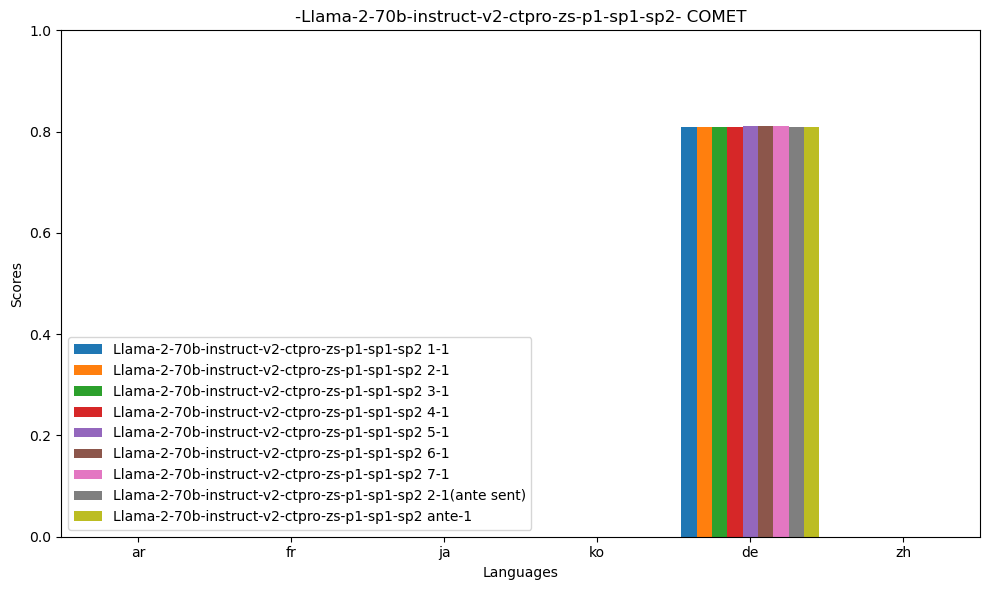

yes
equivalent 1-1 exists


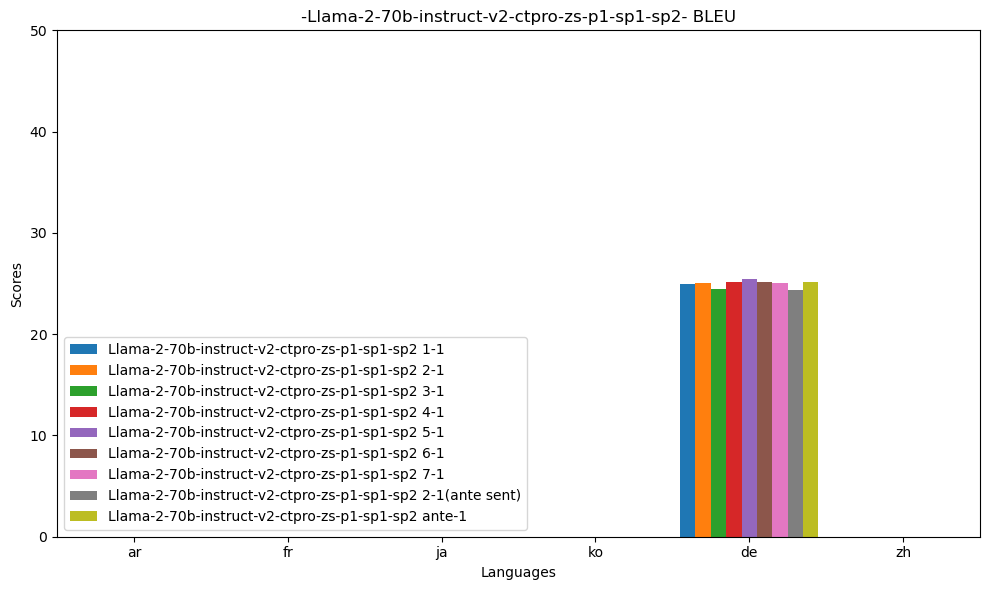

In [33]:
scores_plot("Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2")

[{'model': 'Llama-2-70b-instruct-v2-ctpro-zs-p1', 'scenario': '1-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.8072, 0.0], 'bleu_scores': [0.0, 0.0, 0.0, 0.0, 24.1005, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-ctpro-zs-p1', 'scenario': '2-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.8064, 0.0], 'bleu_scores': [0.0, 0.0, 0.0, 0.0, 23.82, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-ctpro-zs-p1', 'scenario': '3-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.8062, 0.0], 'bleu_scores': [0.0, 0.0, 0.0, 0.0, 24.0502, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-ctpro-zs-p1', 'scenario': '4-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.8075, 0.0], 'bleu_scores': [0.0, 0.0, 0.0, 0.0, 24.5044, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-ctpro-zs-p1', 'scenario': '5-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.808, 0.0], 'bleu_scores': [0.0, 0.0, 0.0, 0.0, 24.4636, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-ctpro-zs-p1', 'scenario': '6-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.8077, 0.0], 'bleu_scores': [0.0, 0.0, 0.

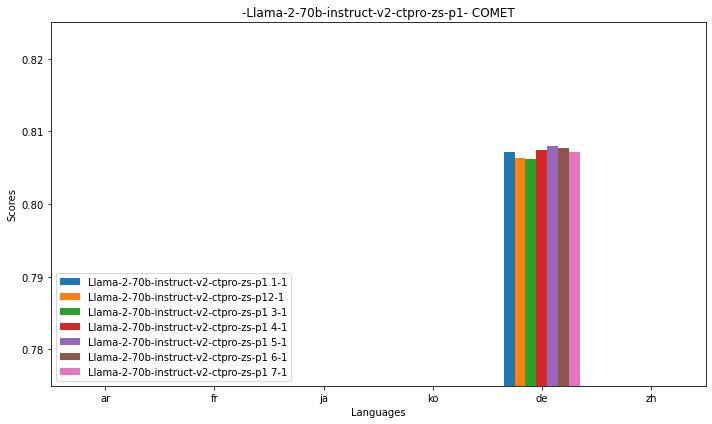

yes
equivalent 1-1 exists


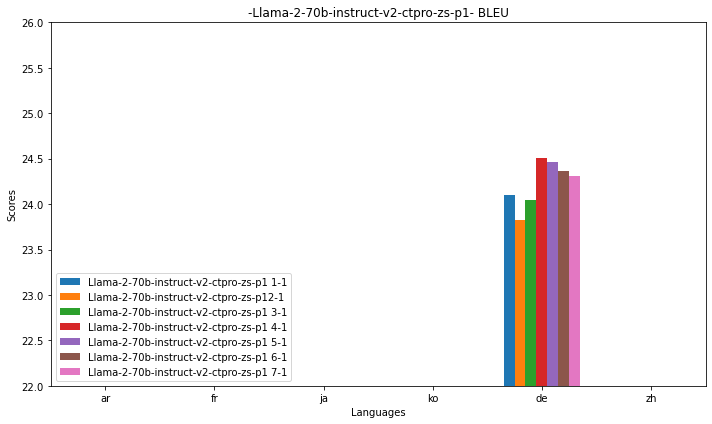

In [58]:
# cancelled without sampling
scores_plot("Llama-2-70b-instruct-v2-ctpro-zs-p1")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


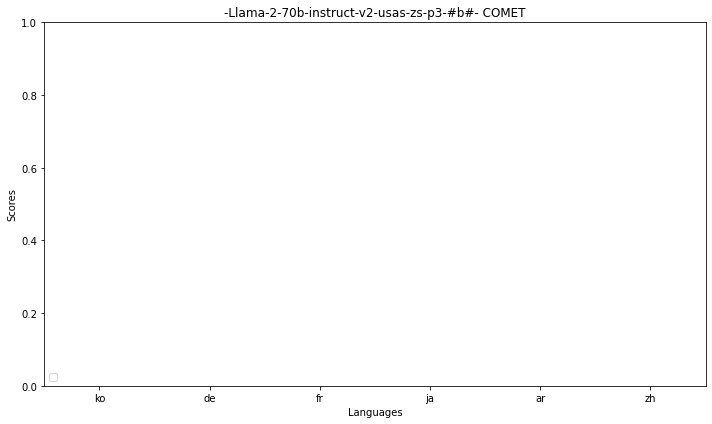

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


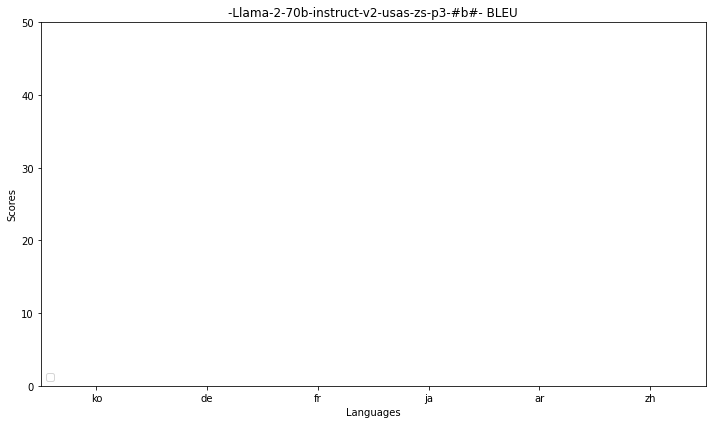

In [11]:
scores_plot("Llama-2-70b-instruct-v2-usas-zs-p3-#b#")

{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '1-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}
equivalent 1-1 does not exists
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '2-1', 'comet_scores': [0.0, 0.8507, 0.8351, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 39.8969, 12.1987, 0.0, 0.0, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '3-1', 'comet_scores': [0.0, 0.8505, 0.8336, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 39.7704, 12.5317, 0.0, 0.0, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '4-1', 'comet_scores': [0.0, 0.8503, 0.8322, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 40.0348, 12.6842, 0.0, 0.0, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '5-1', 'comet_scores': [0.0, 0.8488, 0.8303, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 40.6207, 13.0061, 0.0, 0.0, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '6-1', 'comet_score

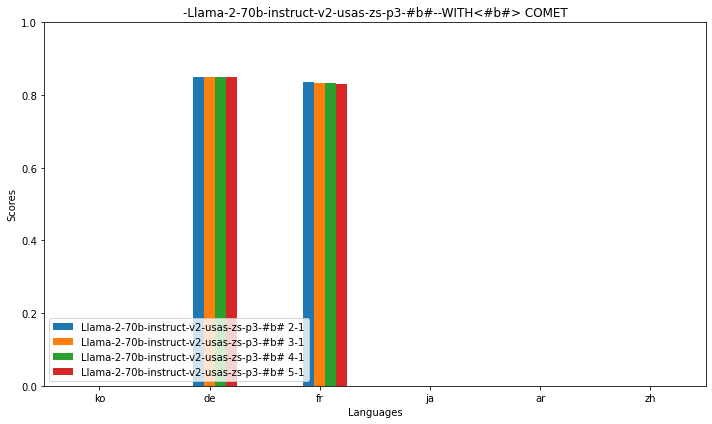

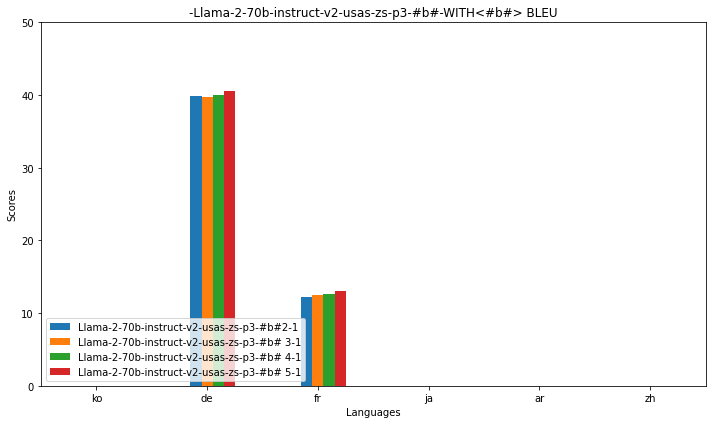

In [12]:
scores_plot_b("Llama-2-70b-instruct-v2-usas-zs-p3-#b#")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


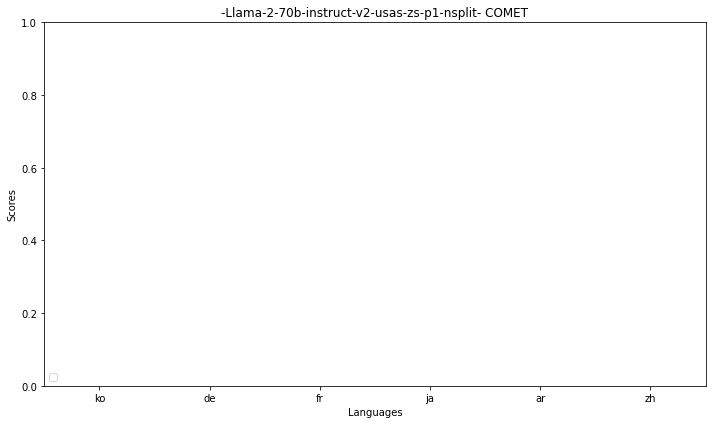

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


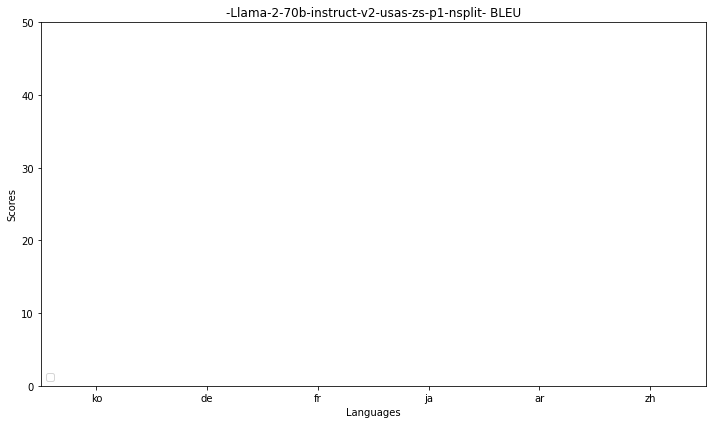

In [13]:
scores_plot("Llama-2-70b-instruct-v2-usas-zs-p1-nsplit")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


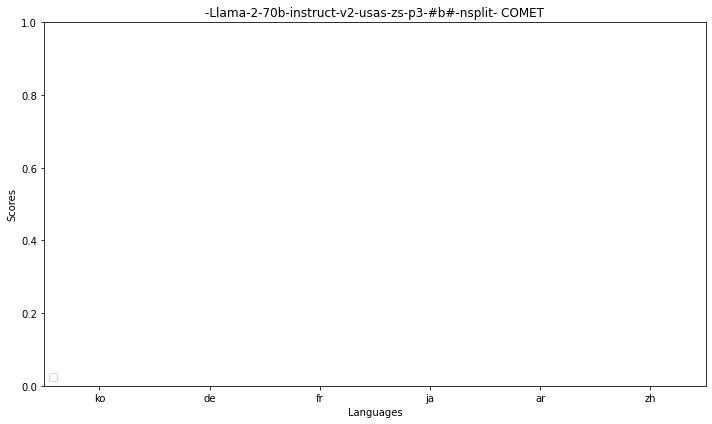

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


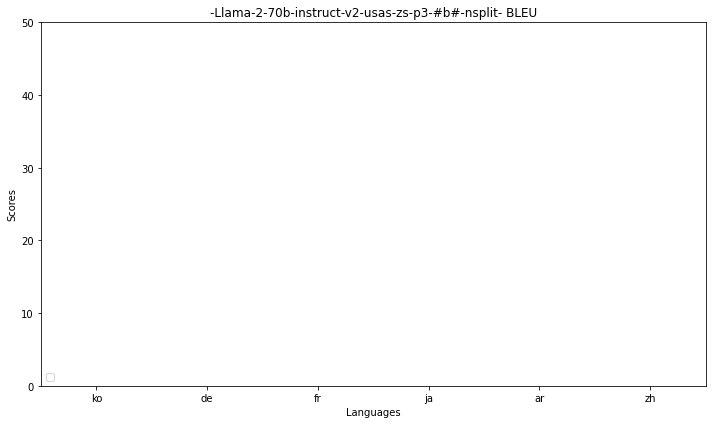

In [14]:
scores_plot("Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit")

{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit', 'scenario': '1-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}
equivalent 1-1 does not exists
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit', 'scenario': '2-1', 'comet_scores': [0.0, 0.0, 0.8347, 0.0, 0.8429, 0.0], 'bleu_scores': [0.0, 0.0, 12.4581, 0.0, 29.9477, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit', 'scenario': '3-1', 'comet_scores': [0.0, 0.0, 0.833, 0.0, 0.8434, 0.0], 'bleu_scores': [0.0, 0.0, 12.5005, 0.0, 30.42, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit', 'scenario': '4-1', 'comet_scores': [0.0, 0.0, 0.8312, 0.0, 0.8419, 0.0], 'bleu_scores': [0.0, 0.0, 12.6585, 0.0, 30.3739, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit', 'scenario': '5-1', 'comet_scores': [0.0, 0.0, 0.8312, 0.0, 0.8398, 0.0], 'bleu_scores': [0.0, 0.0, 13.1039, 0.0, 30.2057, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-n

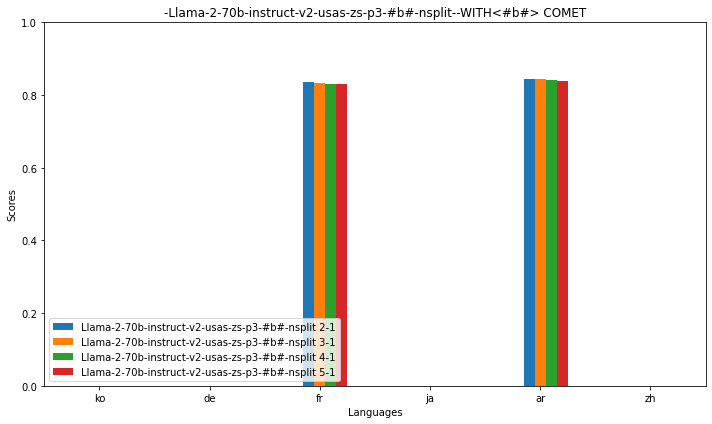

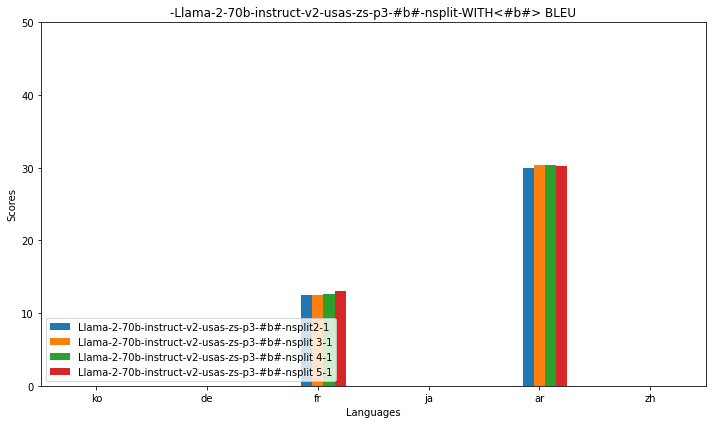

In [15]:
scores_plot_b("Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


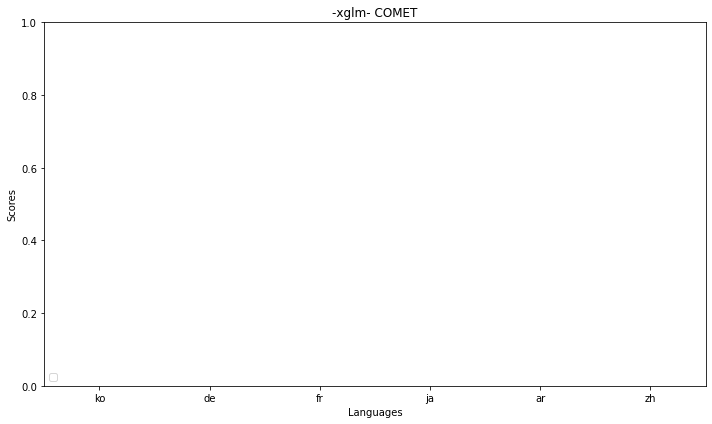

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


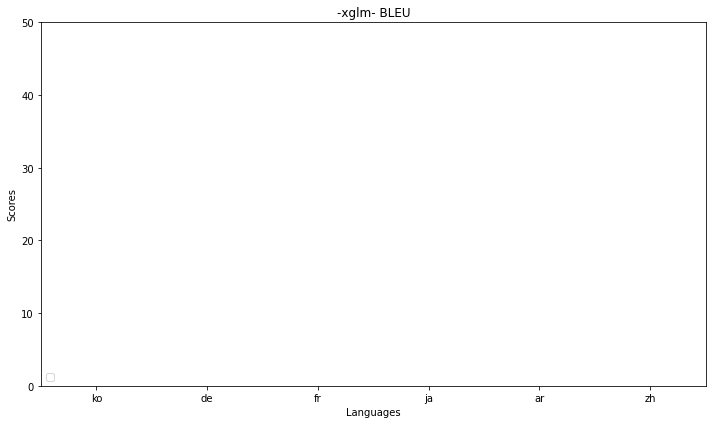

In [16]:
scores_plot("xglm")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


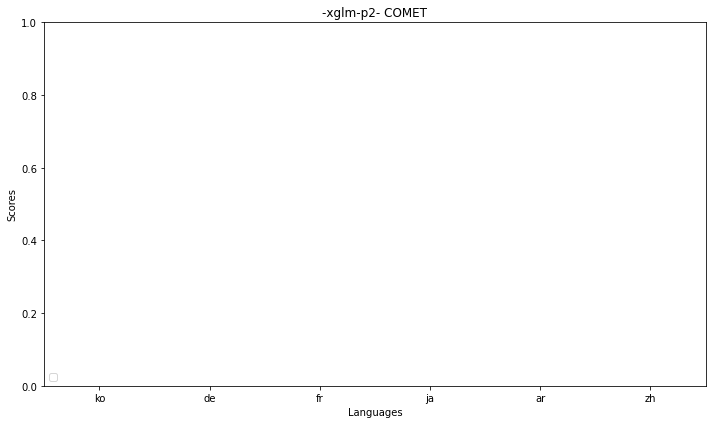

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


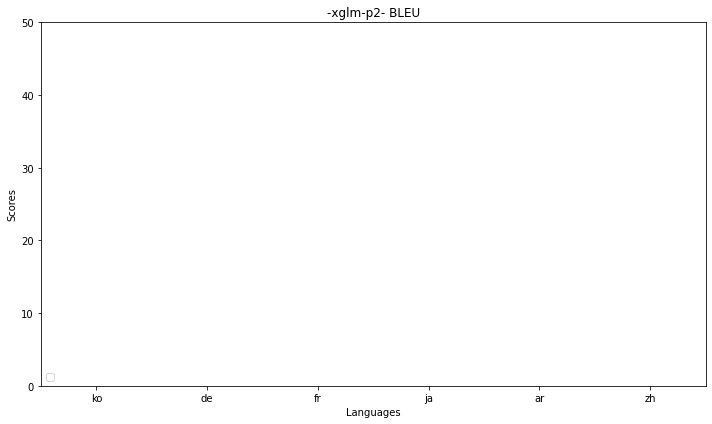

In [17]:
scores_plot("xglm-p2")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


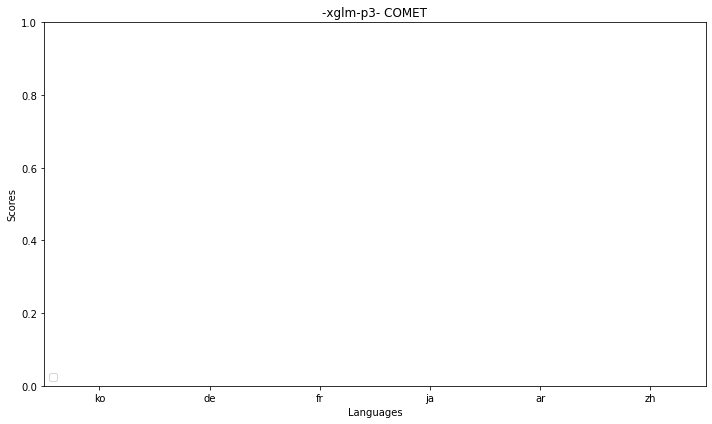

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


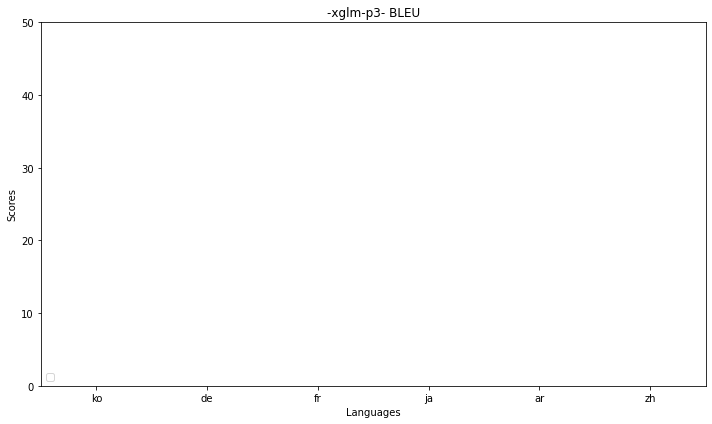

In [18]:
scores_plot("xglm-p3")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


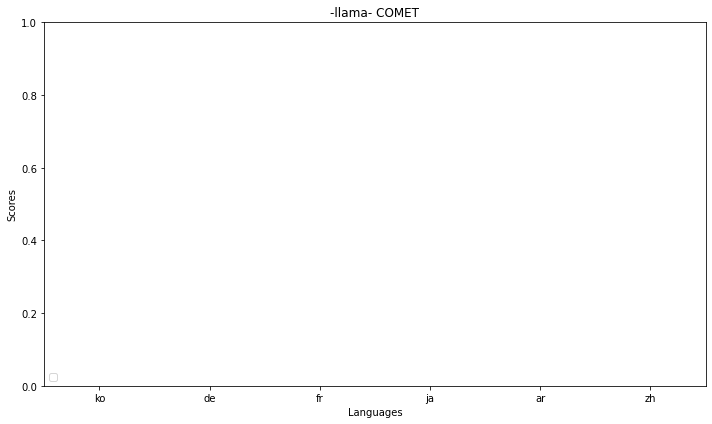

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


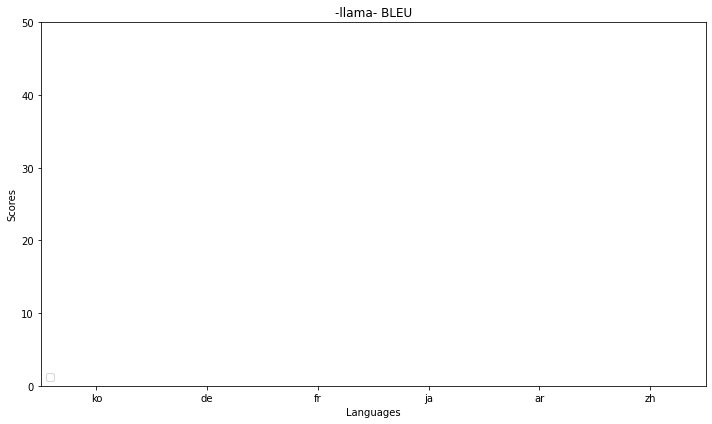

In [19]:
scores_plot("llama")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


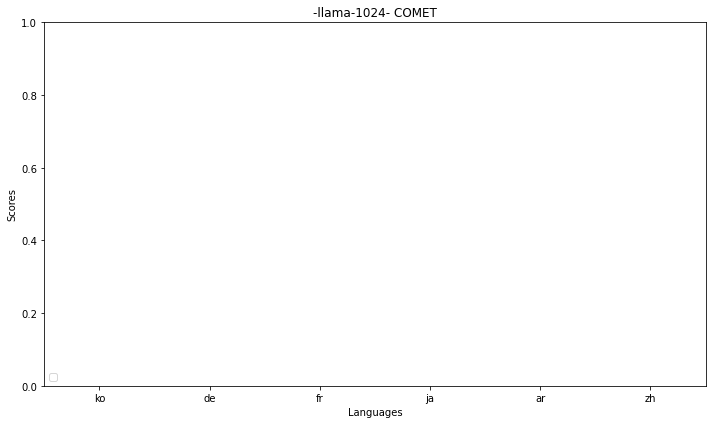

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


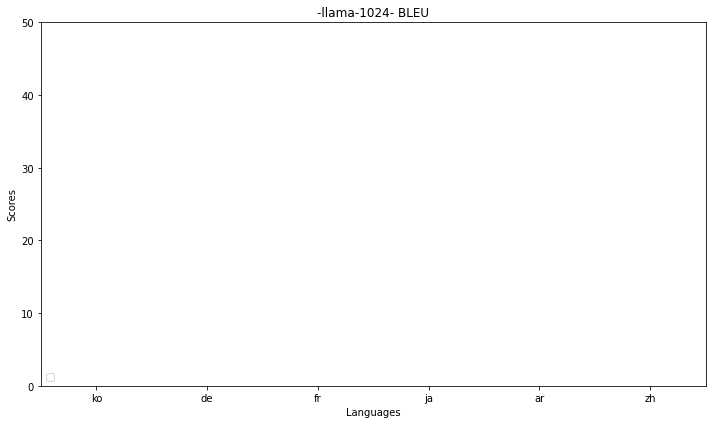

In [20]:
scores_plot("llama-1024")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


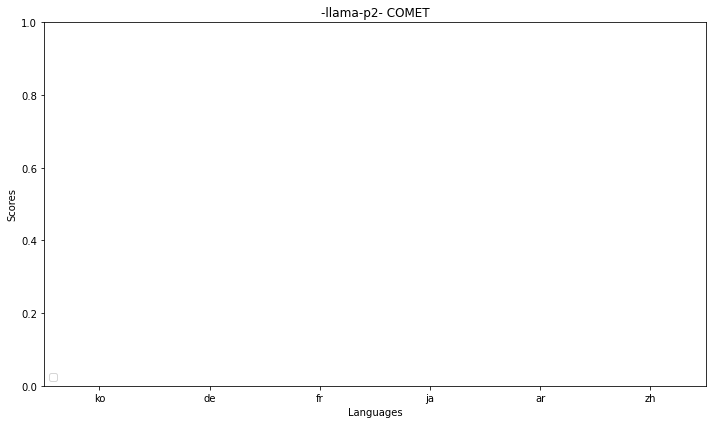

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


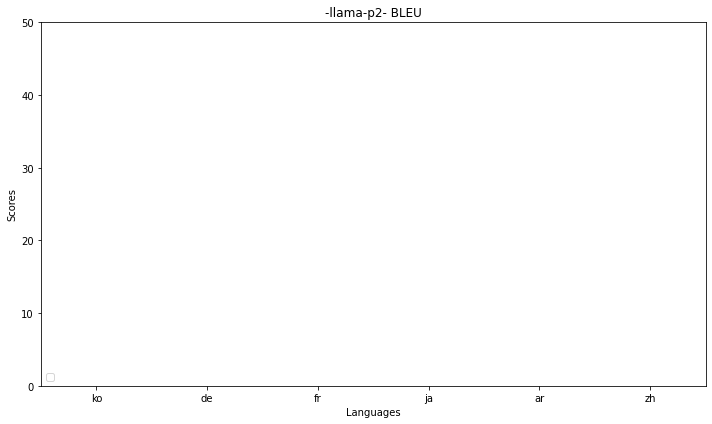

In [21]:
scores_plot("llama-p2")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


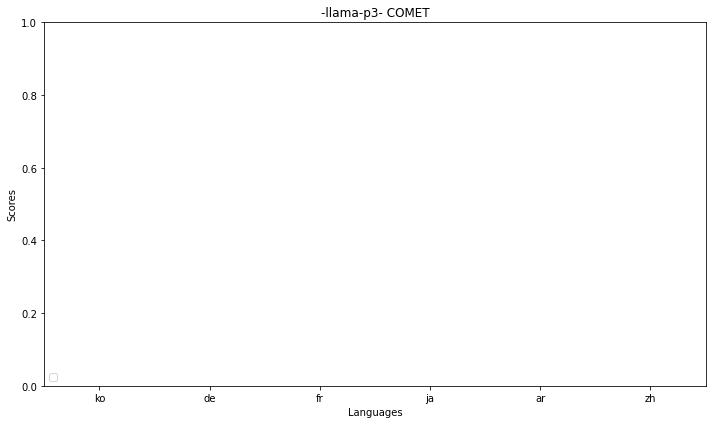

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


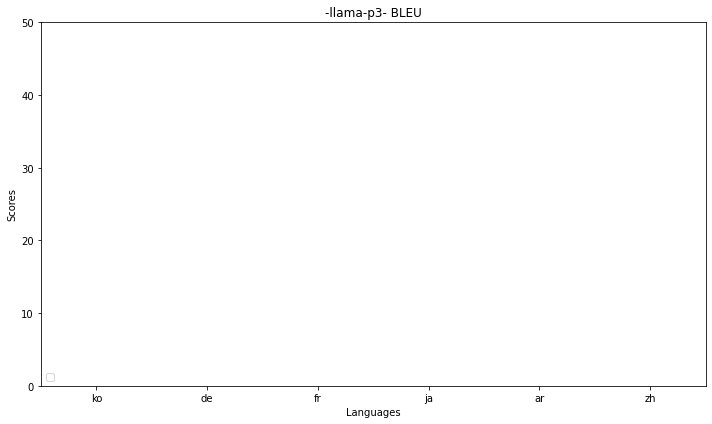

In [22]:
scores_plot("llama-p3")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


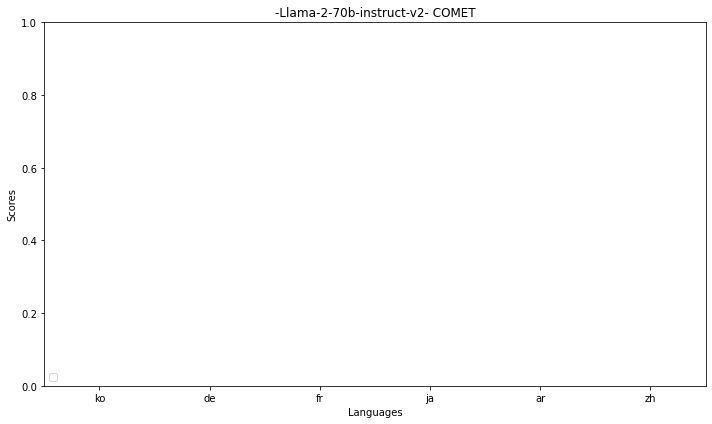

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


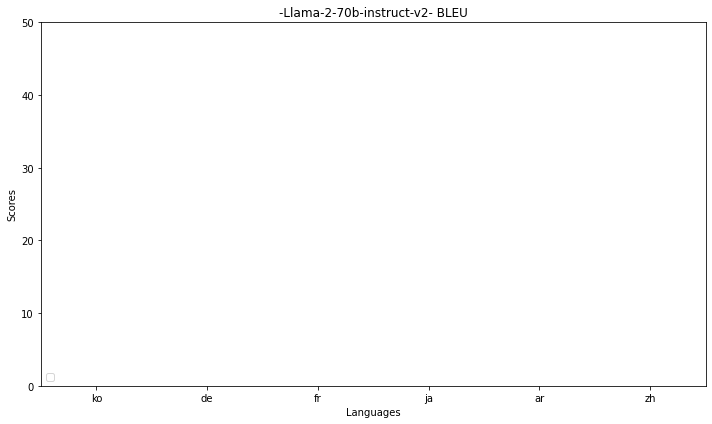

In [23]:
scores_plot("Llama-2-70b-instruct-v2")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


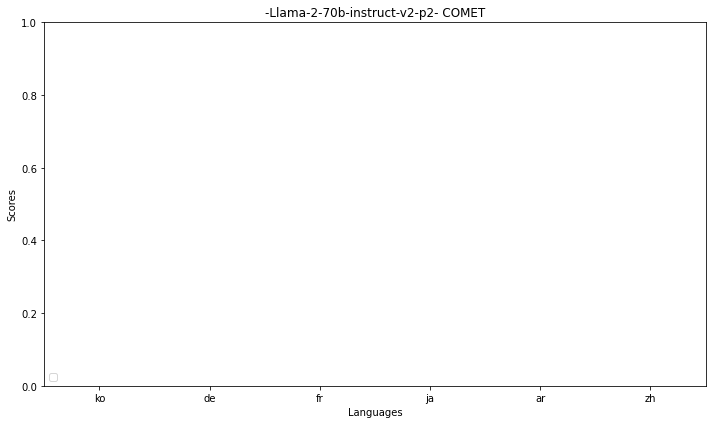

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


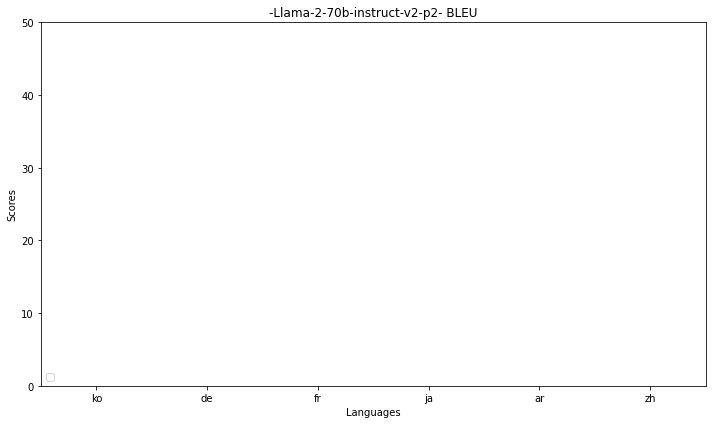

In [24]:
scores_plot("Llama-2-70b-instruct-v2-p2")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


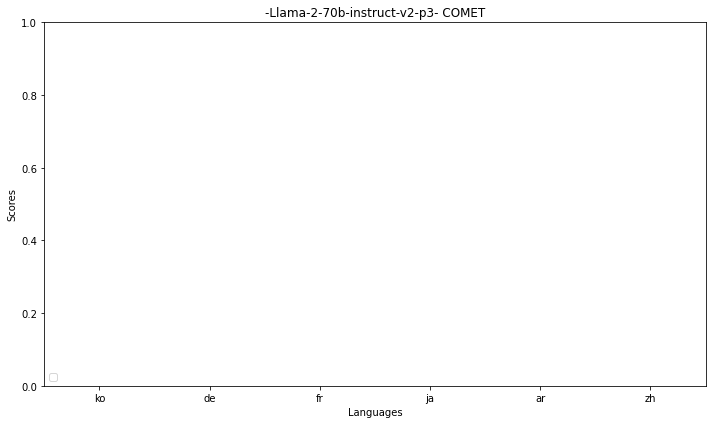

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


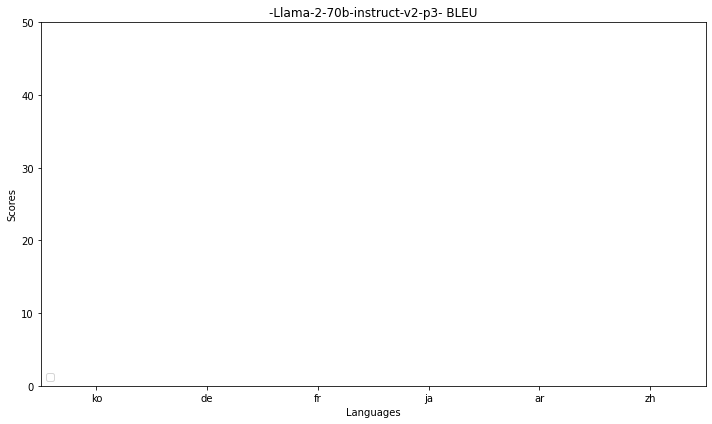

In [25]:
scores_plot("Llama-2-70b-instruct-v2-p3")